In [27]:
import numpy as np

In [28]:
np.random.seed(12345)

In [40]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


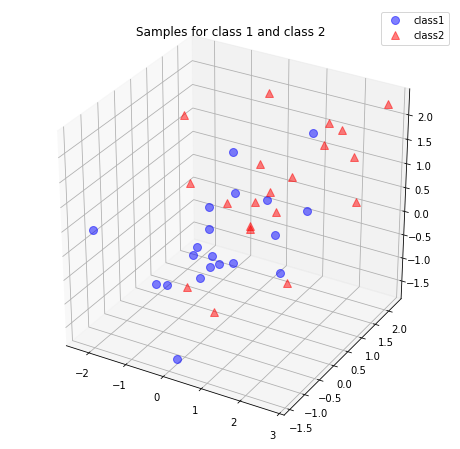

In [47]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10 
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [48]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [49]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.44897071]
 [0.49624335]
 [0.39234079]]


In [53]:
scatter_matrix = np.zeros((3, 3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:, i].reshape(3, 1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter matrix: \n', scatter_matrix)

Scatter matrix: 
 [[57.69028859 16.60283104 28.8549225 ]
 [16.60283104 31.31851978 14.04447934]
 [28.8549225  14.04447934 53.65384102]]


In [54]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.47923817 0.42571362 0.73986981]
 [0.42571362 0.80303897 0.36011485]
 [0.73986981 0.36011485 1.37573951]]


In [55]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.69263732]
 [-0.33545846]
 [-0.63853047]]
Eigenvalue 1 from scatter matrix: 92.33223877505316
Eigenvalue 1 from covariance matrix: 2.3674933019244397
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[-0.58403748]
 [-0.25865516]
 [ 0.76941389]]
Eigenvalue 2 from scatter matrix: 27.02963593653905
Eigenvalue 2 from covariance matrix: 0.6930675881163862
Scaling factor:  38.999999999999986
----------------------------------------
Eigenvector 3: 
[[ 0.4232656]
 [-0.9058505]
 [ 0.0167661]]
Eigenvalue 3 from scatter matrix: 23.30077468155395
Eigenvalue 3 from covariance matrix: 0.5974557610654857
Scaling factor:  39.000000000000014
----------------------------------------


In [56]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:, i].reshape(1, 3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i]*eigv, decimal=6, err_msg='', verbose=True)

Populating the interactive namespace from numpy and matplotlib


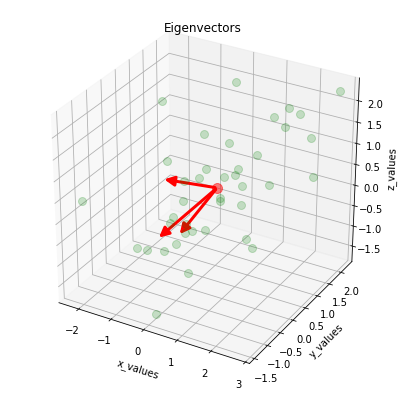

In [61]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [62]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [63]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

92.33223877505316
27.02963593653905
23.30077468155395


In [64]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.69263732 -0.58403748]
 [-0.33545846 -0.25865516]
 [-0.63853047  0.76941389]]


In [66]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

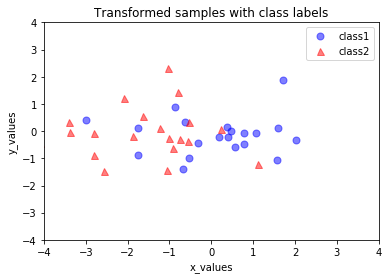

In [67]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

PC axes in terms of the measurement axes scaled by the standard deviations:
 [[ 0.61064577  0.52590372  0.59206167]
 [-0.26959376  0.84104215 -0.46900672]
 [ 0.7446012  -0.12678084 -0.65535919]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The PCA class was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  This is separate from the ipykernel package so we can avoid doing imports until


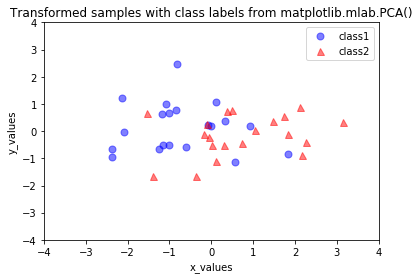

In [68]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(all_samples.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()